In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt, gc


In [9]:
import pyarrow.parquet as pq

# Specify the path to your Parquet file
parquet_file_path = '3911565283.parquet'

#eeg = pd.read_parquet('')

# Read the Parquet file into a PyArrow Table
table = pq.read_table(parquet_file_path)

# If you want to convert the table to a pandas DataFrame
# You need to have pandas installed
import pandas as pd

# Convert the PyArrow Table to a pandas DataFrame
df = table.to_pandas()

# Now you can work with the DataFrame as usual
print(df.head())

print(table)

         Fp1         F3         C3     P3         F7     T3         T5     O1  \
0   9.210000 -47.459999  15.100000   8.22 -16.900000 -22.99 -25.820000 -10.09   
1  -3.590000 -30.290001  32.380001  10.80 -68.980003 -21.60 -15.080000  -9.21   
2 -26.040001 -60.070000   2.370000 -10.15 -34.689999 -31.40 -31.920000 -26.98   
3  -3.040000 -36.250000  29.559999  14.53 -14.010000 -11.90 -14.230000  -6.31   
4  -4.630000 -20.160000  25.190001   1.19 -44.580002 -23.51 -30.709999 -17.60   

          Fz     Cz         Pz         Fp2         F4     C4     P4  \
0  28.370001  -3.01 -27.299999  101.040001  35.110001  14.54  18.33   
1  26.360001  -8.98 -32.279999   95.800003  26.389999   4.82  10.54   
2  -1.940000 -28.77 -49.770000   73.449997  -3.680000 -17.32 -16.15   
3  26.040001  -2.77 -25.030001   91.010002  22.610001   6.90   9.93   
4  25.420000  -8.86 -33.959999   89.449997  19.440001  -2.08   6.11   

          F8         T4         T6     O2         EKG  
0  28.540001  44.090000  69.65

In [11]:
EEG = df

In [47]:
EEG[['Fp1']]

,Fp1
0,9.210000
1,-3.590000
2,-26.040001
3,-3.040000
4,-4.630000
...,...
9995,-26.889999
9996,-24.049999
9997,-34.500000
9998,-16.110001


In [13]:
middle = (len(EEG)-10_000)//2
eeg = EEG.iloc[middle:middle+10_000]

In [15]:
EEG.shape

(10000, 20)

In [16]:
eeg.shape

(10000, 20)

In [20]:
new_table=pq.read_table('1000086677.parquet')
spect = new_table.to_pandas()

In [23]:
spect.columns

Index(['time', 'LL_0.59', 'LL_0.78', 'LL_0.98', 'LL_1.17', 'LL_1.37',
       'LL_1.56', 'LL_1.76', 'LL_1.95', 'LL_2.15',
       ...
       'RP_18.16', 'RP_18.36', 'RP_18.55', 'RP_18.75', 'RP_18.95', 'RP_19.14',
       'RP_19.34', 'RP_19.53', 'RP_19.73', 'RP_19.92'],
      dtype='object', length=401)

In [22]:
spect.shape

(300, 401)

In [24]:
FEATS = [['Fp1','F7','T3','T5','O1'],
         ['Fp1','F3','C3','P3','O1'],
         ['Fp2','F8','T4','T6','O2'],
         ['Fp2','F4','C4','P4','O2'],]


In [38]:
IO=FEATS[3]
IO[1]

'F4'

In [29]:
import librosa

In [30]:
from scipy.ndimage import gaussian_filter
from scipy.signal import butter, filtfilt, firwin

In [39]:
for k in range(4):
        COLS = FEATS[k]
        if k < 4:
            for kk in range(4):
        
                # COMPUTE PAIR DIFFERENCES
                
                x = EEG[COLS[kk]].values - EEG[COLS[kk+1]].values
                

#x = EEG[COLS[kk]].values - EEG[COLS[kk+1]].values

In [40]:
x

array([-12.41    , -12.78    , -25.64    , ..., -52.12    , -50.050003,
       -40.63    ], dtype=float32)

In [41]:
x.shape

(10000,)

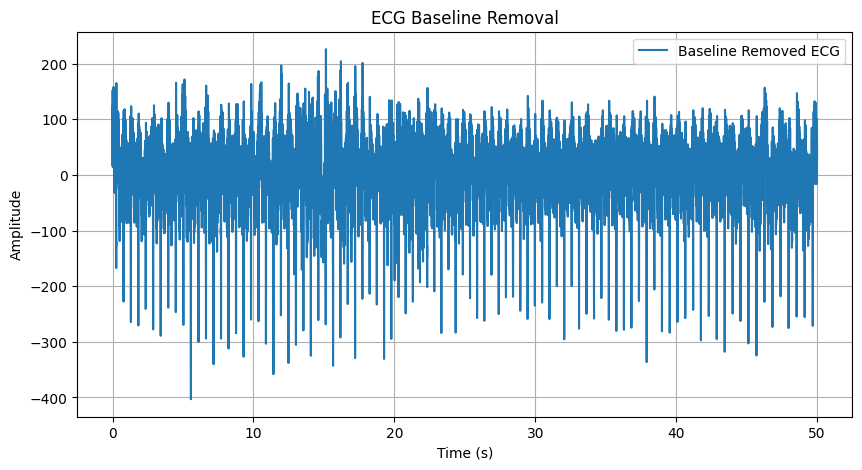

In [75]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

# Assuming EEG is your DataFrame and 'EKG' is the column containing the ECG signal
ecg = EEG['EKG']

# Sampling frequency
fs = 200  # Hz

# Apply high-pass filter for baseline removal
cutoff_freq = 0.5  # cutoff frequency in Hz
b, a = signal.butter(2, cutoff_freq / (0.5 * fs), 'high')
baseline_removed_ecg = signal.filtfilt(b, a, ecg)

# Time array
T = np.arange(len(ecg)) / fs

# Plotting
plt.figure(figsize=(10, 5))
#plt.plot(T, ecg, label='Original ECG')
plt.plot(T, baseline_removed_ecg, label='Baseline Removed ECG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ECG Baseline Removal')
plt.legend()
plt.grid(True)
plt.show()


In [71]:
b

array([ 0.99778102, -1.99556205,  0.99778102])

In [72]:
a

array([ 1.        , -1.99555712,  0.99556697])